In [1]:
import pandas as pd
import matplotlib.pyplot as plt
IM_File = 'KMBL IM Data.xlsx'  
sla_file="KMBL SLA.xlsx"
im_df = pd.read_excel(IM_File)
sla_df=pd.read_excel(sla_file)

In [2]:
im_df = pd.merge(im_df, sla_df, on='Priority', how="left")
im_df['Time taken for resolution (days)'] = (im_df['Resolution Date'] - im_df['Creation Date']).dt.days
def convert_sla_to_timedelta(sla):
    parts = sla.split(':')
    days = int(parts[0])
    hours = int(parts[1])  
    minutes = int(parts[2])  
    seconds = int(parts[3])  
    return pd.Timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)

im_df['SLA'] = im_df['SLA'].apply(convert_sla_to_timedelta)
im_df['SLA Breached By (days)'] = im_df['Time taken for resolution (days)'] - im_df['SLA'].dt.days

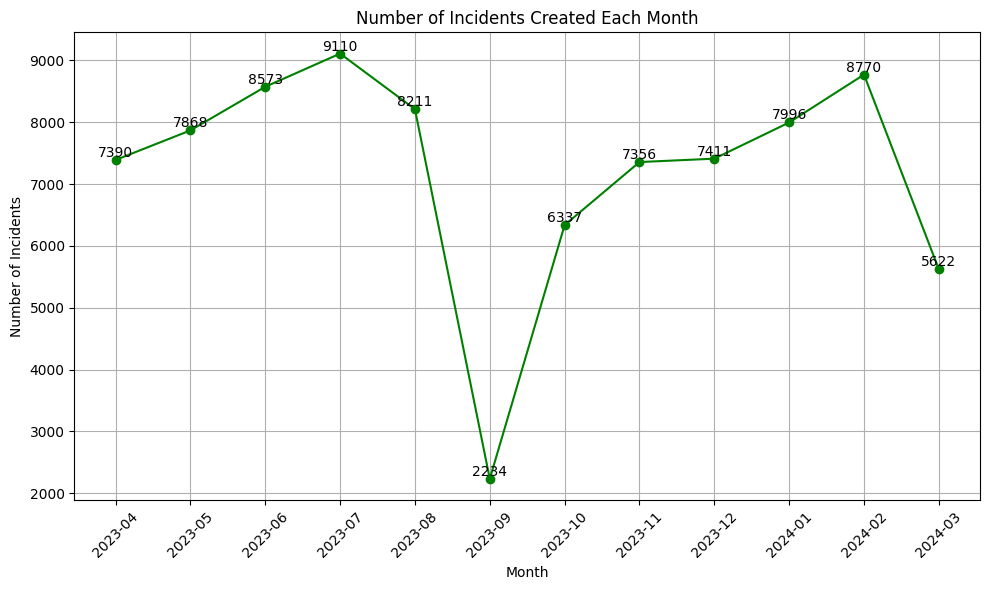

In [3]:
im_df['Creation Month'] = im_df['Creation Date'].dt.to_period('M')

# Count incidents per month
creation_monthly_counts = im_df['Creation Month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(creation_monthly_counts.index.astype(str), creation_monthly_counts.values, marker='o', linestyle='-', color="green")

# Adding data labels with an offset below the marker
#label_offset = 100 # Adjust this value as needed
for i, count in enumerate(creation_monthly_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Number of Incidents Created Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# plt.legend()
plt.show()

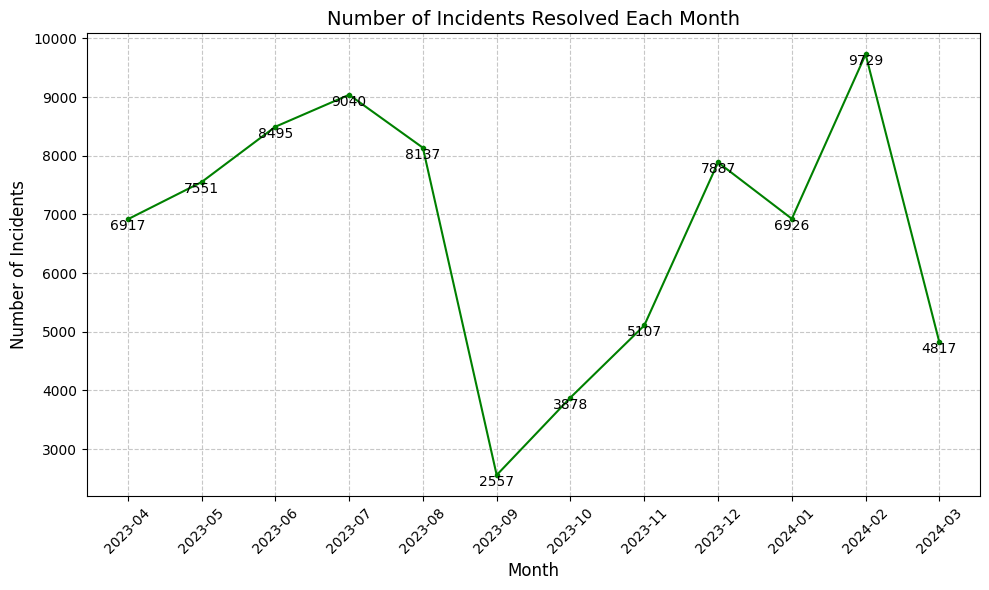

In [4]:
im_df['Resolution Month'] = im_df['Resolution Date'].dt.to_period('M')

# Count incidents per month
resolution_monthly_counts = im_df['Resolution Month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(resolution_monthly_counts.index.astype(str), resolution_monthly_counts.values, marker='.', linestyle='-', color="green")

# Adding data labels with a bigger gap below the marker
#label_offset = 100.0  # Increase this value for a bigger gap
for i, count in enumerate(resolution_monthly_counts.values):
    plt.text(i, count, str(count), ha='center', va='top', fontsize=10)

plt.title('Number of Incidents Resolved Each Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.legend()
plt.show()

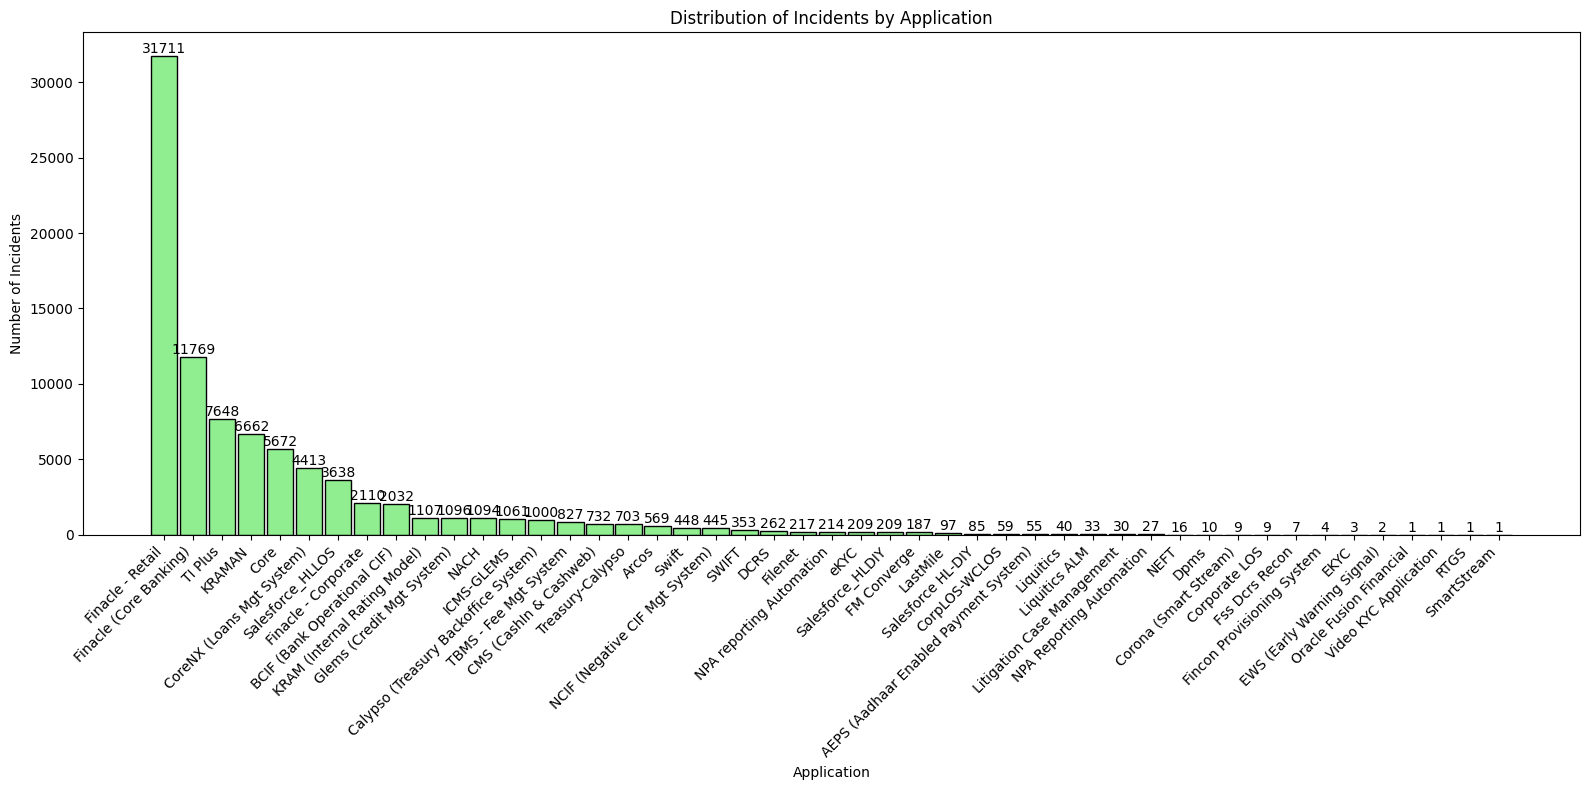

In [5]:
application_counts = im_df['Application'].value_counts()

# Plot histogram
plt.figure(figsize=(16, 8))  # Increase figure size for more space
bars = plt.bar(application_counts.index, application_counts.values, color='lightgreen', width=0.9, edgecolor='black')  # Increase bar width and add edge color for better distinction

# Labeling bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

plt.title('Distribution of Incidents by Application')
plt.xlabel('Application')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

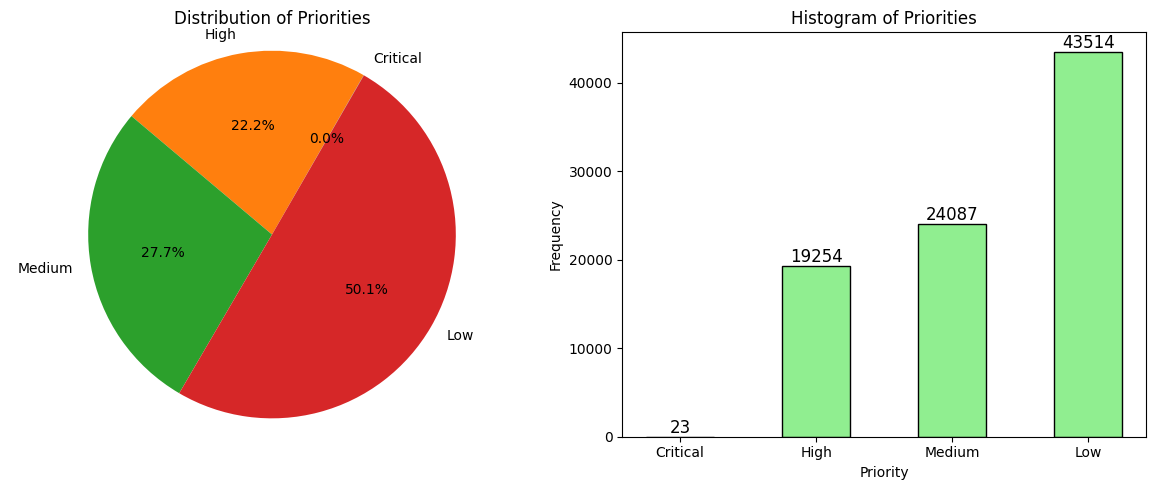

In [6]:
custom_order = ['Critical', 'High', 'Medium', 'Low']

# Reindex priority counts based on custom order
priority_counts = im_df['Priority'].value_counts().reindex(custom_order, fill_value=0)

# Create a figure with two subplots: one for the pie chart and one for the histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the pie chart on the first subplot
ax1.pie(priority_counts, labels=priority_counts.index, autopct='%1.1f%%', startangle=60)
ax1.set_title('Distribution of Priorities')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot the histogram on the second subplot
bars = ax2.bar(priority_counts.index, priority_counts.values, color='lightgreen', width=0.5, edgecolor='black')
ax2.set_title('Histogram of Priorities')
ax2.set_xlabel('Priority')
ax2.set_ylabel('Frequency')

# Labeling each bar with its count
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=12)

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Display the plot
plt.show()

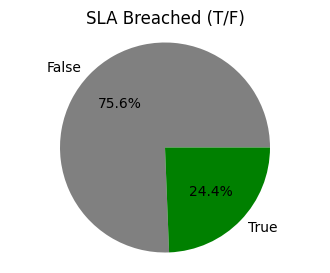

In [7]:
im_df['SLA Breached(T/F)'] = im_df['SLA Breached By (days)'].apply(lambda x: True if x >= 1 else False)
sla_breached_counts = im_df['SLA Breached(T/F)'].value_counts()

# Define colors for the pie chart wedges
colors = ['gray', 'green']

# Plotting a pie chart
plt.figure(figsize=(4, 3))
plt.pie(sla_breached_counts, labels=sla_breached_counts.index, colors=colors, autopct='%1.1f%%', startangle=0)
plt.title('SLA Breached (T/F)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


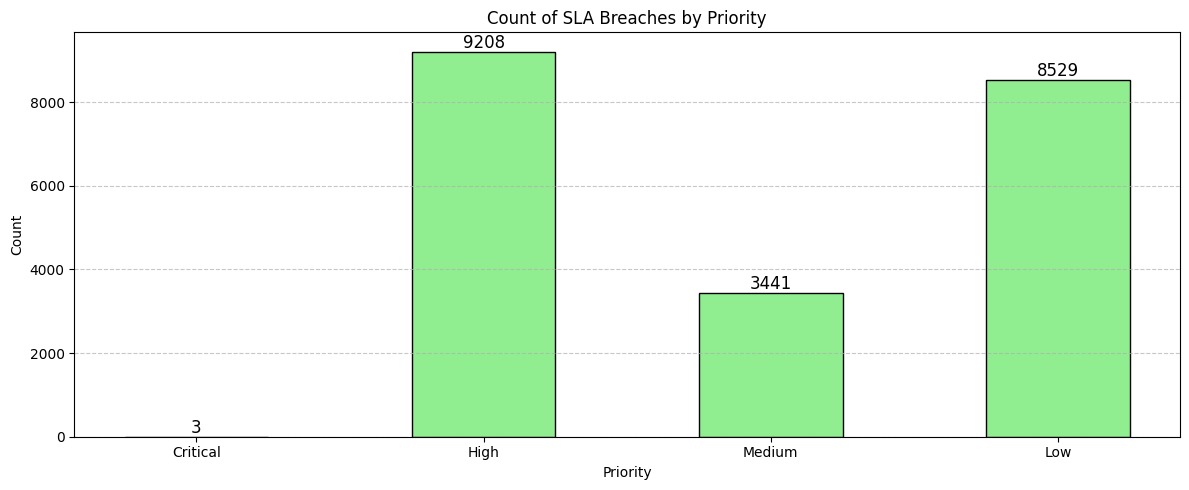

In [8]:
sla_breaches = im_df[im_df['SLA Breached(T/F)'] == True]

# Count SLA Breaches for each priority level
sla_breaches_count = sla_breaches.groupby('Priority').size()

# Define custom order of priorities
custom_order = ['Critical','High', 'Medium', 'Low']

# Reindex sla_breaches_count based on custom_order
sla_breaches_count = sla_breaches_count.reindex(custom_order)

# Plotting the histogram
plt.figure(figsize=(12, 5))  # Increase figure size for more space
bars = plt.bar(sla_breaches_count.index, sla_breaches_count.values, color='lightgreen', width=0.5, edgecolor='black')  # Adjust bar width and add edge color for better distinction

# Labeling bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=12)

plt.title('Count of SLA Breaches by Priority')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


   Priority  total_incidents  breached_incidents  breached_percentage
0  Critical               23                   3            13.043478
1      High            19254                9208            47.823829
2       Low            43514                8529            19.600588
3    Medium            24087                3441            14.285714


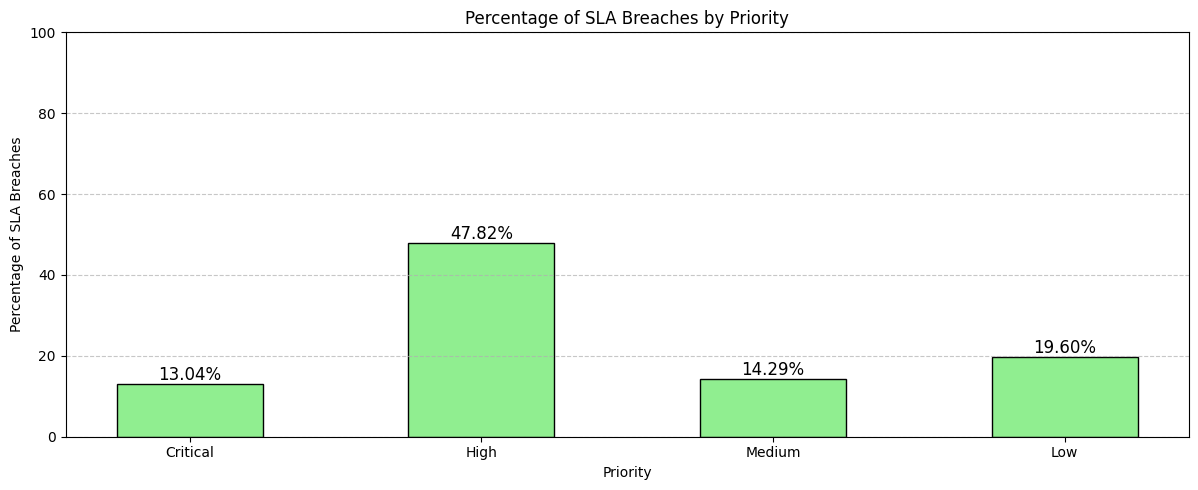

In [9]:
sla_breached_percentage = im_df.groupby('Priority').agg(
    total_incidents=('Incident ID', 'count'),
    breached_incidents=('SLA Breached(T/F)', 'sum')
).reset_index()

# Calculate the percentage of breached SLAs
sla_breached_percentage['breached_percentage'] = (
    sla_breached_percentage['breached_incidents'] / sla_breached_percentage['total_incidents'] * 100
)

print(sla_breached_percentage)
custom_order = ['Critical', 'High', 'Medium', 'Low']

# Reindex sla_breached_percentage based on custom_order
sla_breached_percentage = sla_breached_percentage.set_index('Priority').reindex(custom_order).reset_index()

# Plotting the histogram
plt.figure(figsize=(12, 5))  # Increase figure size for more space
bars = plt.bar(sla_breached_percentage['Priority'], sla_breached_percentage['breached_percentage'], color='lightgreen', width=0.5, edgecolor='black')  # Adjust bar width and add edge color for better distinction

# Labeling bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12)

plt.title('Percentage of SLA Breaches by Priority')
plt.xlabel('Priority')
plt.ylabel('Percentage of SLA Breaches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(0, 100)  # Assuming the percentage should be between 0 and 100
plt.show()

In [10]:
final_df = im_df[im_df['SLA Breached(T/F)'] == True]

# Write final_df to Excel
excel_file = "SLA Breached FInal Output.xlsx"
final_df.to_excel(excel_file, index=False)

print(f"DataFrame with SLA Breached(T/F) = True has been written to {excel_file}")

DataFrame with SLA Breached(T/F) = True has been written to SLA Breached FInal Output.xlsx


In [11]:
final_df.columns

Index(['Incident ID', 'Priority', 'Status', 'Creation Date', 'Resolution Date',
       'Application', 'Description', 'SLA', 'Time taken for resolution (days)',
       'SLA Breached By (days)', 'Creation Month', 'Resolution Month',
       'SLA Breached(T/F)'],
      dtype='object')